In [1]:
import os
from shutil import rmtree
import sys

import xarray as xr

sys.path.append('..')

from src.test_problem import setup_solver
from src import nk_driver
from src.share import args_replace, common_args
from src.utils import mkdir_exist_okay

from utils import plot_all_vars

%matplotlib inline

In [2]:
wdir = os.path.join(os.getenv("HOME"), "test_run_latest_phosphorus_restoring_surf_wdir")
if os.path.exists(wdir):
    if os.path.isfile(wdir):
        os.remove(wdir)
    else:
        rmtree(wdir)

In [3]:
# args common to all invocations to parse_args
args_base = ["--workdir", wdir, "--tracer_module_names", "phosphorus"]

In [4]:
# create override cfg file, append its fname to cfg_fnames, and add to args_base
override_cfg_fname = os.path.join(wdir, "override.cfg")
mkdir_exist_okay(wdir)
with open(override_cfg_fname, mode="w") as fptr:
    fptr.write("[modelinfo]\n")
    fptr.write("po4_s_restoring_opt=0\n")

parser, args_remaining = common_args(description="querying default args", model_name="test_problem", args_list=args_base)
args = args_replace(parser.parse_args(args_remaining))
cfg_fnames = ",".join([args.cfg_fnames, override_cfg_fname])

args_base.extend(["--cfg_fnames", cfg_fnames])

In [5]:
setup_solver.main(setup_solver.parse_args(args_base + ["--fp_cnt", "1"]))

2021-03-16 07:25:35,182:43878:setup_solver.py:main:args.cfg_fnames="/Users/klindsay/codes/Newton-Krylov_OOC/input/test_problem/newton_krylov.cfg,/Users/klindsay/codes/Newton-Krylov_OOC/input/test_problem/model_params.cfg,/Users/klindsay/test_run_latest_phosphorus_restoring_surf_wdir/override.cfg"
2021-03-16 07:25:35,188:43878:gen_invoker_script.py:gen_invoker_script:generating /Users/klindsay/test_run_latest_phosphorus_restoring_surf_wdir/nk_driver.sh
2021-03-16 07:25:35,191:43878:setup_solver.py:main:grid_weight_fname="/Users/klindsay/test_run_latest_phosphorus_restoring_surf_wdir/depth_axis.nc"
2021-03-16 07:25:35,221:43878:setup_solver.py:main:fp_iter=0
2021-03-16 07:25:59,461:43878:setup_solver.py:main:init_iterate_fname="/Users/klindsay/test_run_latest_phosphorus_restoring_surf_wdir/gen_init_iterate/init_iterate.nc"


<xarray.Dataset>
Dimensions:       (depth: 30, depth_edges: 31, nbnds: 2)
Coordinates:
  * depth         (depth) float64 5.0 15.01 25.07 35.32 ... 775.1 825.0 875.0
  * depth_edges   (depth_edges) float64 0.0 10.0 20.02 ... 800.0 850.0 900.0
Dimensions without coordinates: nbnds
Data variables:
    depth_bounds  (depth, nbnds) float64 ...
    depth_delta   (depth) float64 ...
    po4           (depth) float64 ...
    dop           (depth) float64 ...
    pop           (depth) float64 ...
    po4_s         (depth) float64 ...
    dop_s         (depth) float64 ...
    pop_s         (depth) float64 ...
Attributes:
    history:  2021-03-16 07:25:35: created by src.test_problem.model_state.Mo...


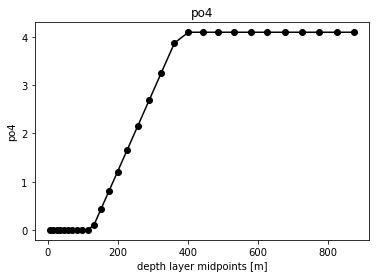

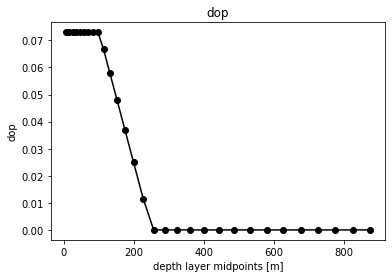

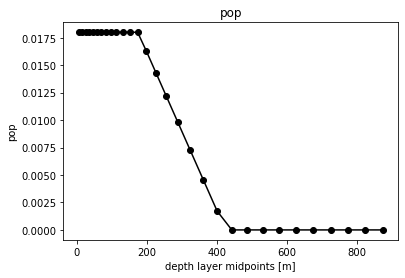

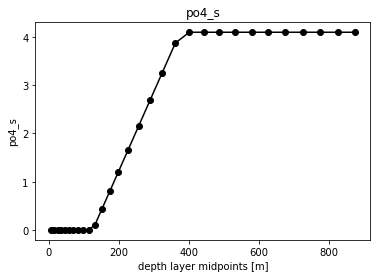

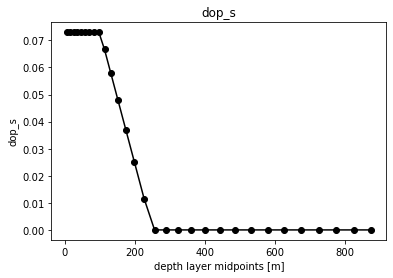

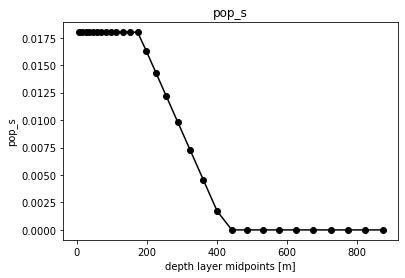

In [6]:
with xr.open_dataset(os.path.join(wdir, "gen_init_iterate", "init_iterate_00.nc")) as ds:
    print(ds)
    plot_all_vars(ds)

<xarray.Dataset>
Dimensions:                         (depth: 30, depth_edges: 31, nbnds: 2, time: 101)
Coordinates:
  * time                            (time) object 0001-01-01 00:00:00 ... 000...
  * depth                           (depth) float64 5.0 15.01 ... 825.0 875.0
  * depth_edges                     (depth_edges) float64 0.0 10.0 ... 900.0
Dimensions without coordinates: nbnds
Data variables: (12/52)
    depth_bounds                    (depth, nbnds) float64 ...
    depth_delta                     (depth) float64 ...
    bldepth                         (time) float64 ...
    mixing_coeff                    (time, depth_edges) float64 ...
    po4                             (time, depth) float64 ...
    po4_time_mean                   (depth) float64 ...
    ...                              ...
    po4_s_restore_tau_r             (time, depth) float64 ...
    po4_s_restore_tau_r_time_mean   (depth) float64 ...
    po4_s_restore_tau_r_time_anom   (time, depth) float64 ...
    p

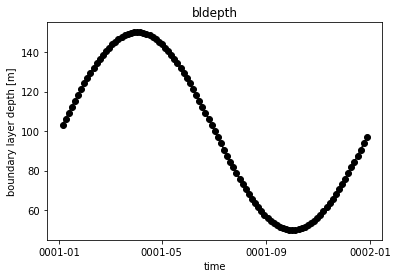

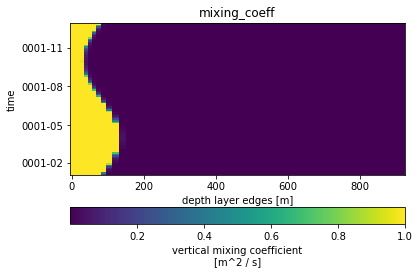

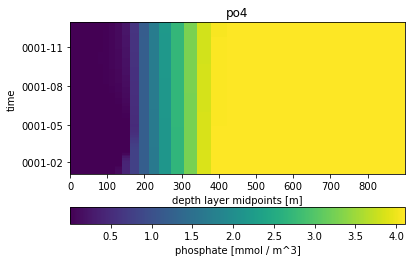

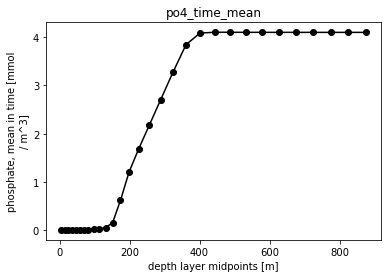

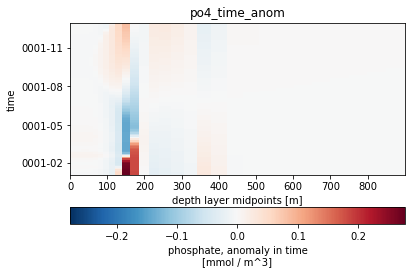

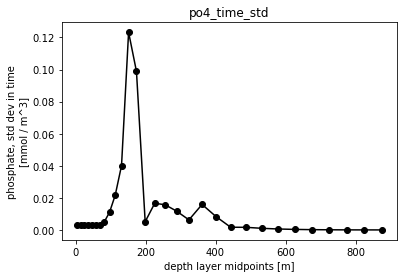

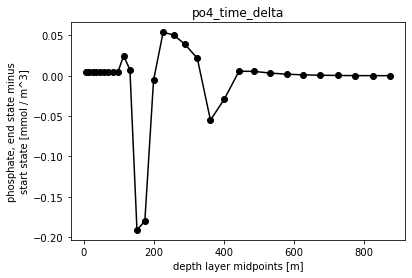

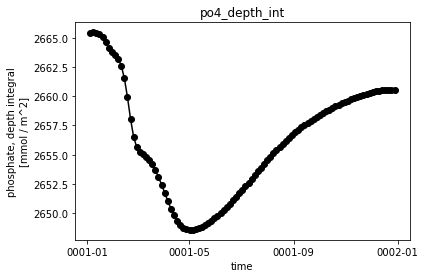

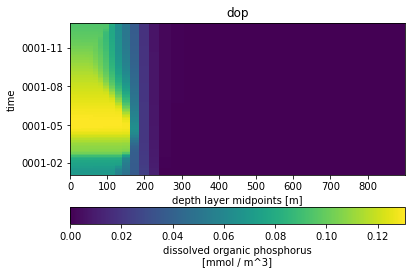

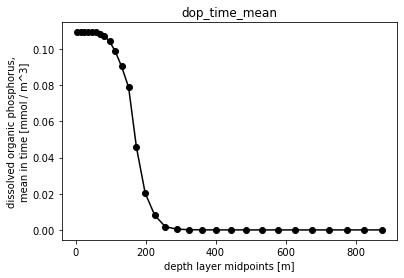

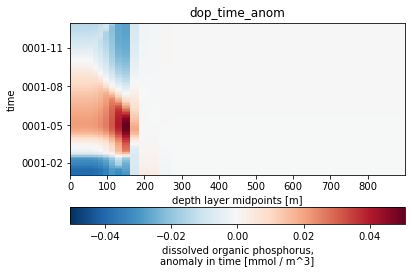

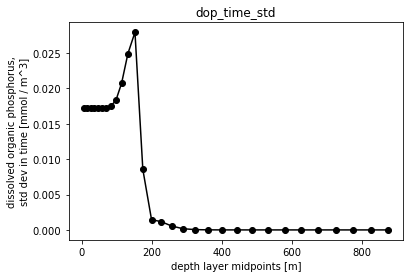

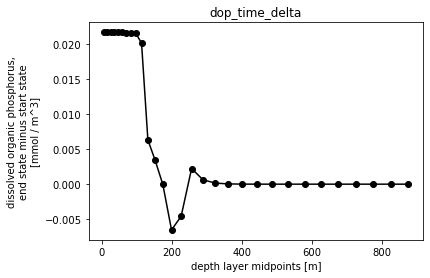

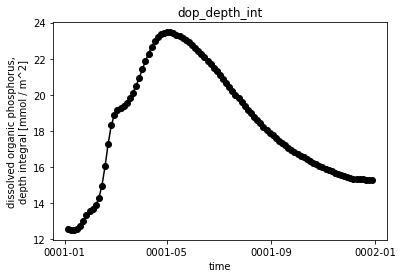

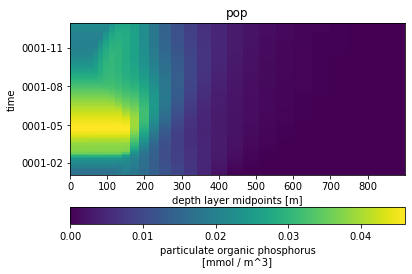

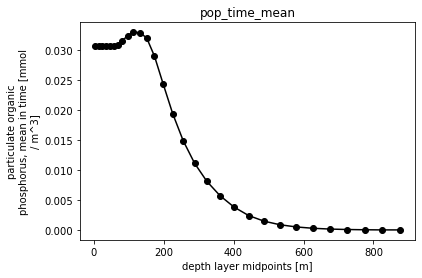

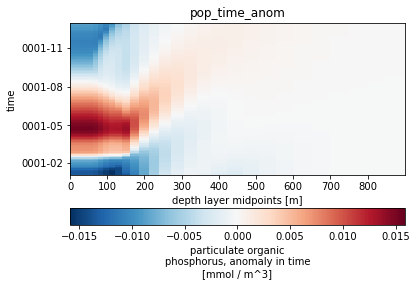

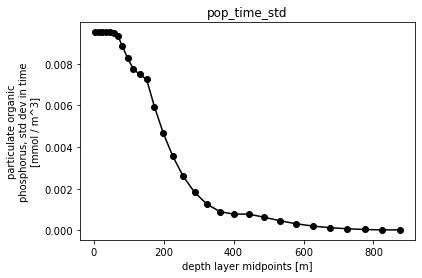

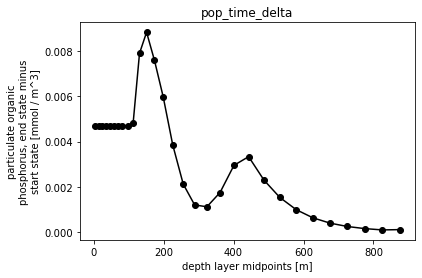

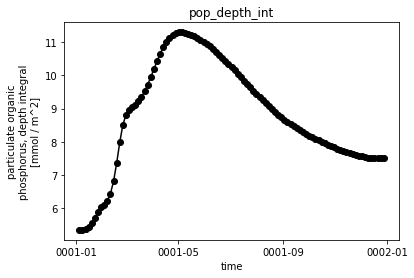

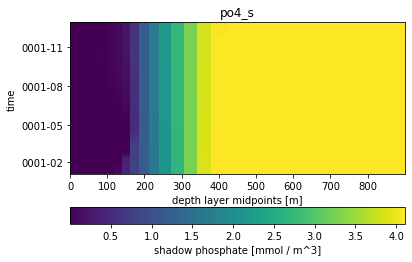

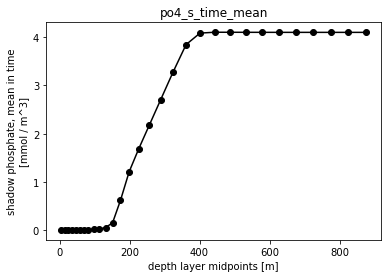

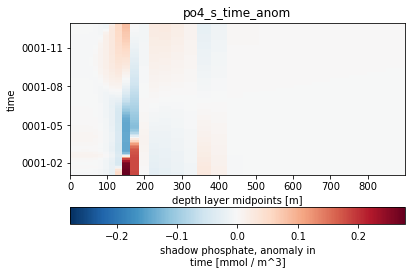

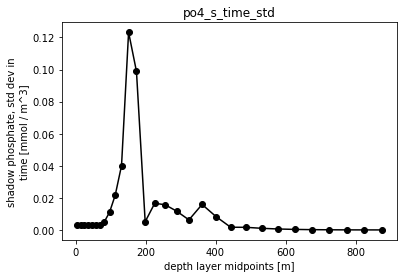

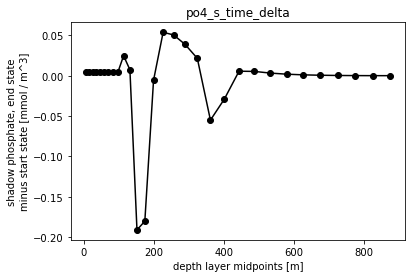

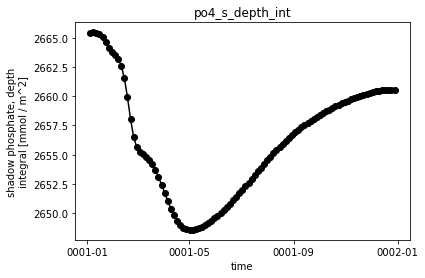

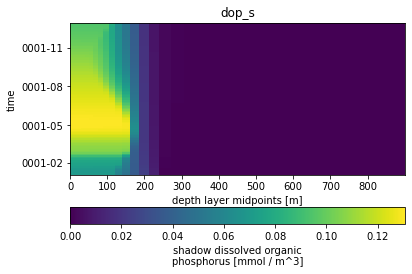

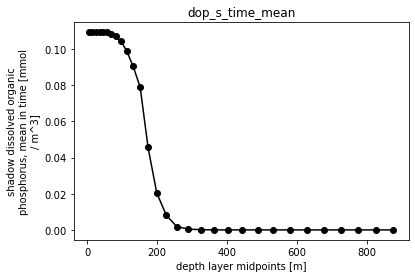

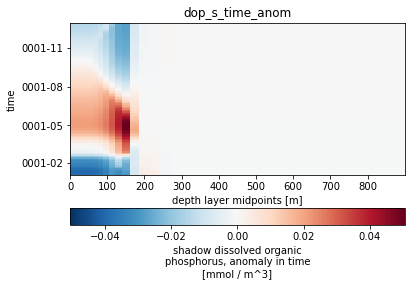

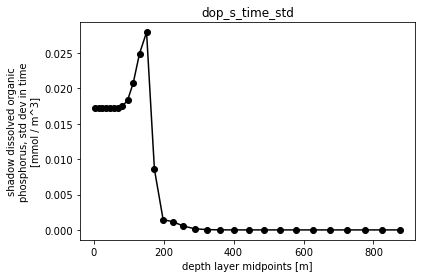

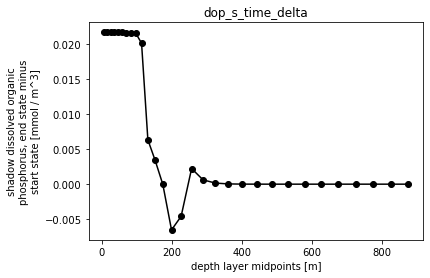

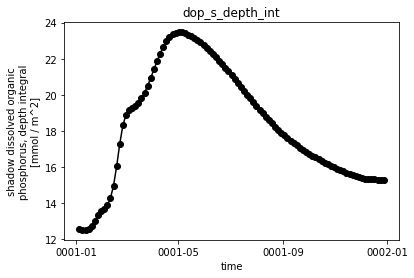

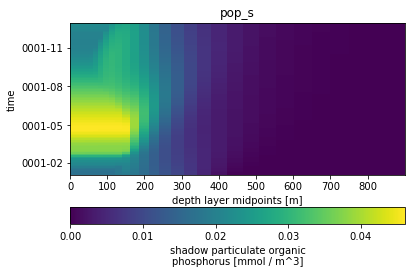

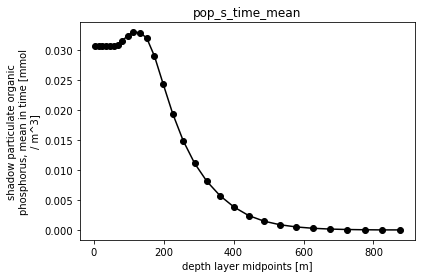

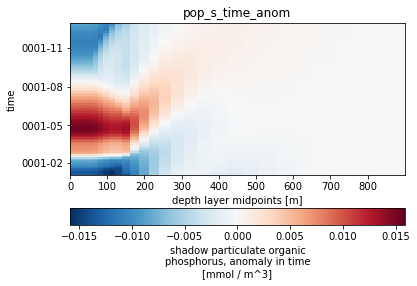

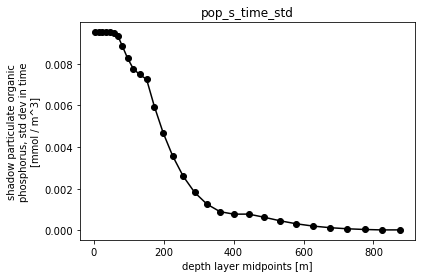

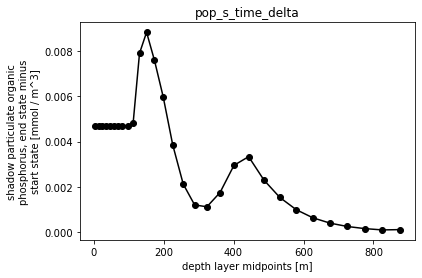

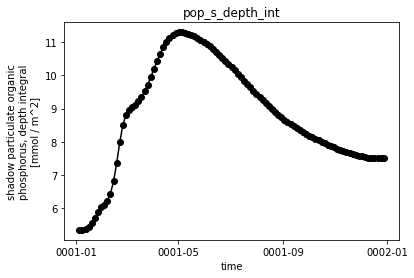

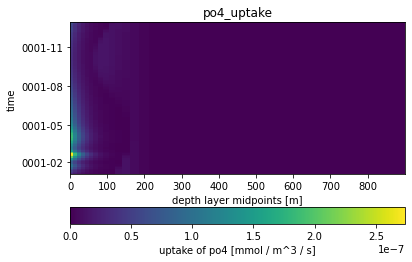

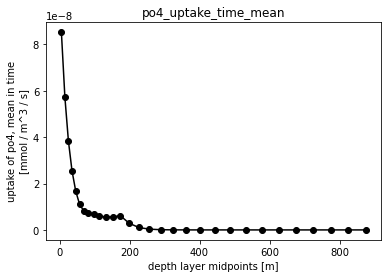

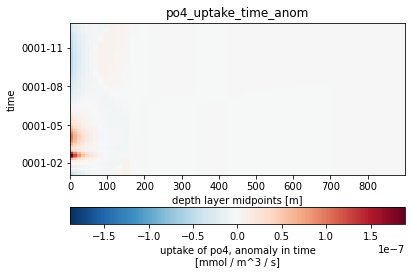

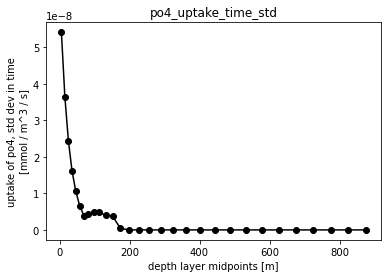

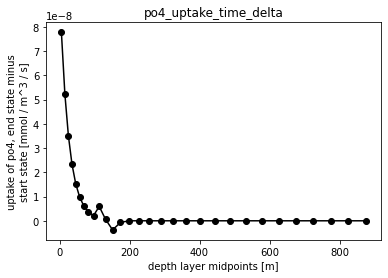

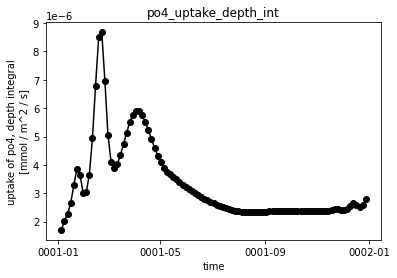

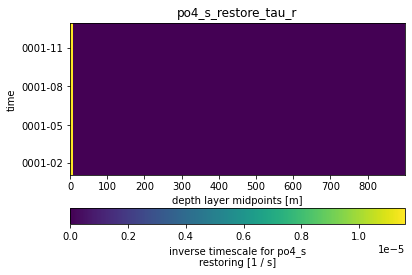

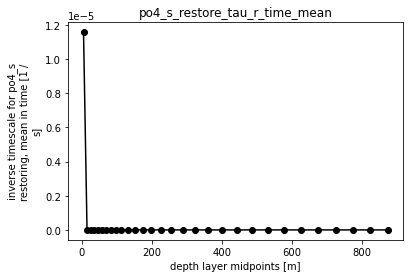

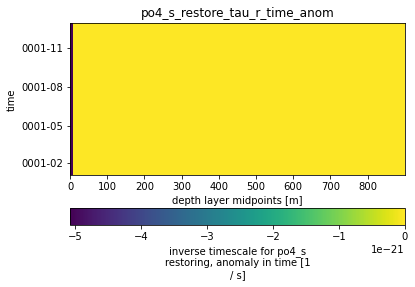

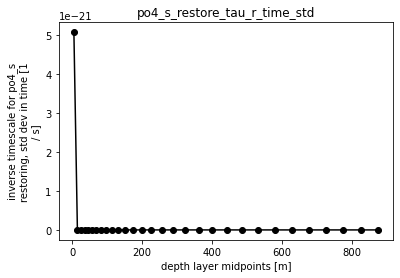

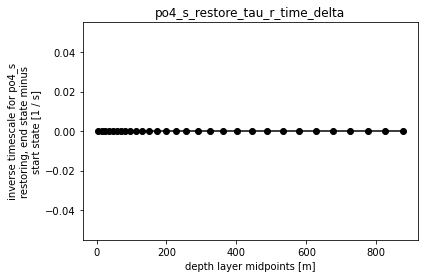

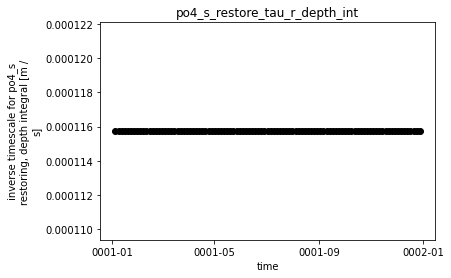

In [7]:
with xr.open_dataset(os.path.join(wdir, "gen_init_iterate", "hist_00.nc")) as ds:
    print(ds)
    plot_all_vars(ds)

<xarray.Dataset>
Dimensions:       (depth: 30, depth_edges: 31, nbnds: 2)
Coordinates:
  * depth         (depth) float64 5.0 15.01 25.07 35.32 ... 775.1 825.0 875.0
  * depth_edges   (depth_edges) float64 0.0 10.0 20.02 ... 800.0 850.0 900.0
Dimensions without coordinates: nbnds
Data variables:
    depth_bounds  (depth, nbnds) float64 ...
    depth_delta   (depth) float64 ...
    po4           (depth) float64 ...
    dop           (depth) float64 ...
    pop           (depth) float64 ...
    po4_s         (depth) float64 ...
    dop_s         (depth) float64 ...
    pop_s         (depth) float64 ...
Attributes:
    history:  2021-03-16 07:25:59: created by src.test_problem.model_state.Mo...


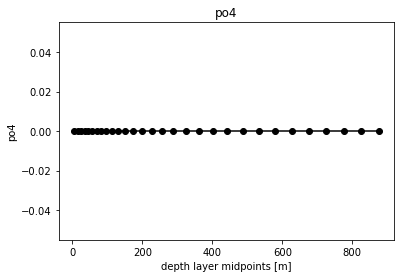

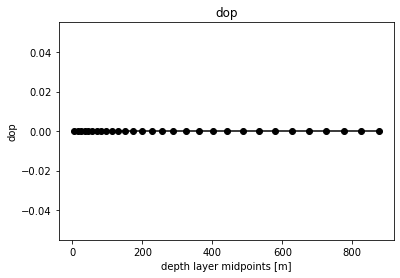

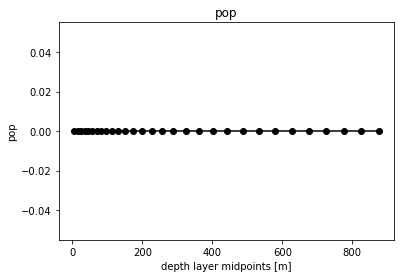

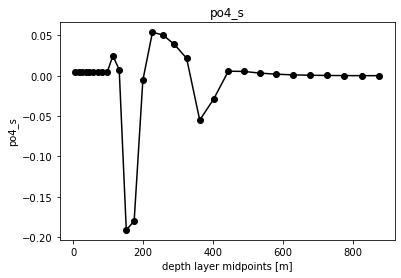

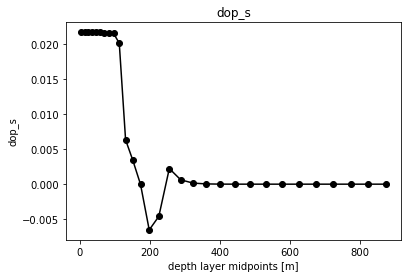

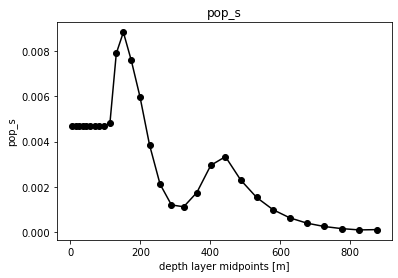

In [8]:
with xr.open_dataset(os.path.join(wdir, "gen_init_iterate", "fcn_00.nc")) as ds:
    print(ds)
    plot_all_vars(ds)

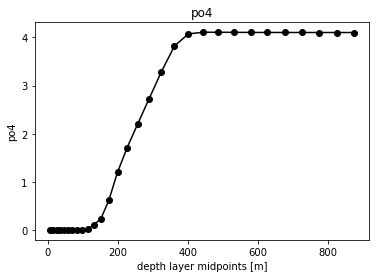

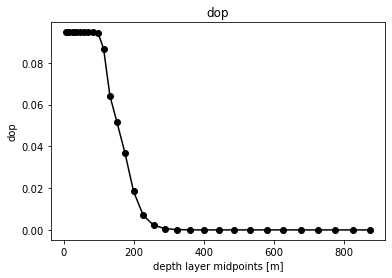

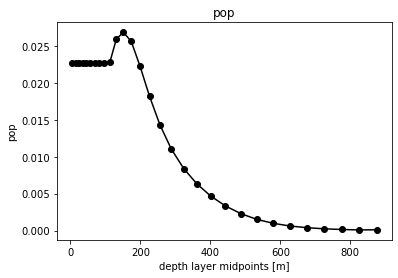

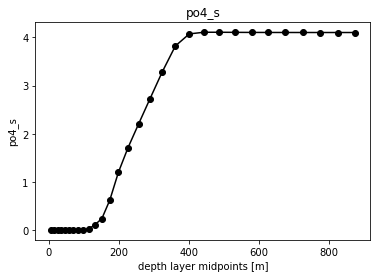

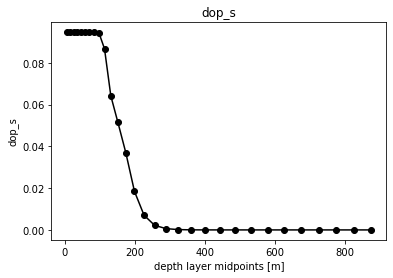

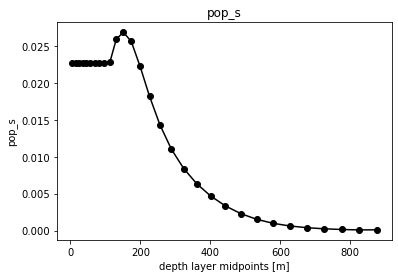

In [9]:
with xr.open_dataset(os.path.join(wdir, "gen_init_iterate", "init_iterate.nc")) as ds:
    plot_all_vars(ds)

In [10]:
try:
    nk_driver.main(nk_driver.parse_args(args_base + ["--persist"]))
except RuntimeError as err:
    print(str(err))
    print("number of maximum Newton iterations exceeded" not in str(err))
    if "number of maximum Newton iterations exceeded" not in str(err):
        raise

2021-03-16 07:26:11,952:43878:nk_driver.py:_get_model_state_class:using class ModelState from src.test_problem.model_state for model state
2021-03-16 07:26:11,952:43878:model_config.py:__init__:loading content from /Users/klindsay/codes/Newton-Krylov_OOC/input/test_problem/tracer_module_defs.yaml
2021-03-16 07:26:11,964:43878:model_config.py:check_shadow_tracers:tracer module phosphorus has po4_s as a shadow for po4
2021-03-16 07:26:11,965:43878:model_config.py:check_shadow_tracers:tracer module phosphorus has dop_s as a shadow for dop
2021-03-16 07:26:11,966:43878:model_config.py:check_shadow_tracers:tracer module phosphorus has pop_s as a shadow for pop
2021-03-16 07:26:11,967:43878:model_config.py:__init__:reading depth_delta from /Users/klindsay/test_run_latest_phosphorus_restoring_surf_wdir/depth_axis.nc for grid_weight
2021-03-16 07:26:11,970:43878:solver_state.py:__init__:"Newton" iteration now 0
2021-03-16 07:26:33,987:43878:tracer_module_state_base.py:log_vals:iteration=00,ite

<xarray.Dataset>
Dimensions:                    (depth: 30, depth_edges: 31, iteration: 4, nbnds: 2, region: 1)
Coordinates:
  * iteration                  (iteration) int32 0 1 2 3
  * depth                      (depth) float64 5.0 15.01 25.07 ... 825.0 875.0
  * depth_edges                (depth_edges) float64 0.0 10.0 ... 850.0 900.0
Dimensions without coordinates: nbnds, region
Data variables: (12/16)
    iterate_mean_phosphorus    (iteration, region) float64 ...
    iterate_norm_phosphorus    (iteration, region) float64 ...
    fcn_mean_phosphorus        (iteration, region) float64 ...
    fcn_norm_phosphorus        (iteration, region) float64 ...
    increment_mean_phosphorus  (iteration, region) float64 ...
    increment_norm_phosphorus  (iteration, region) float64 ...
    ...                         ...
    dop                        (iteration, region, depth) float64 ...
    pop                        (iteration, region, depth) float64 ...
    po4_s                      (itera

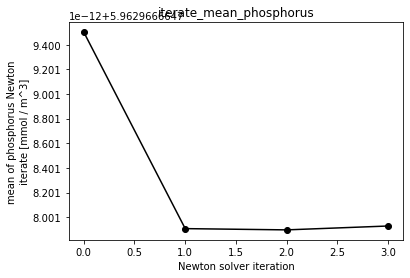

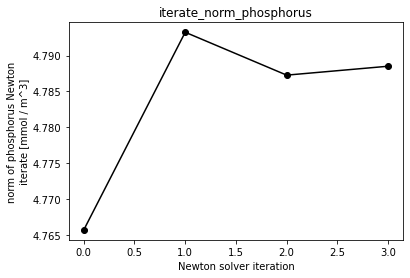

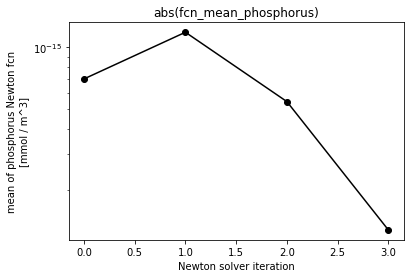

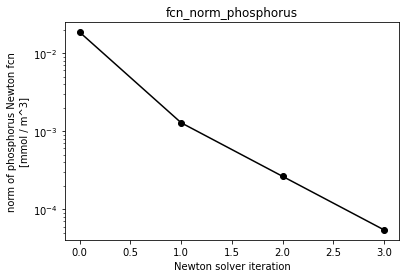

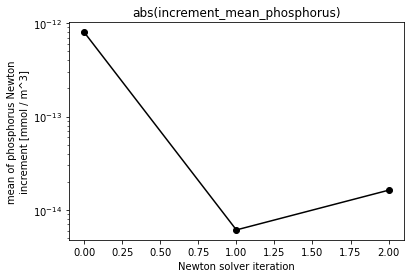

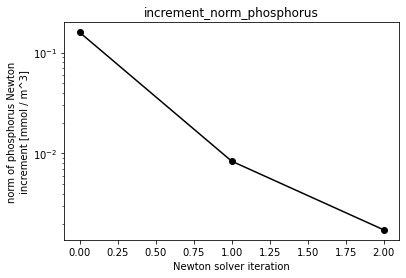

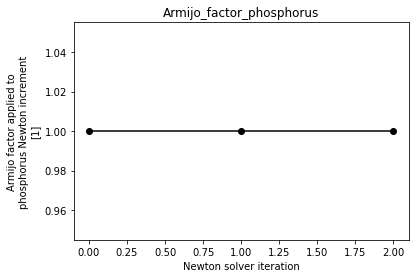

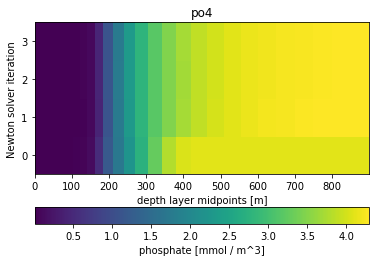

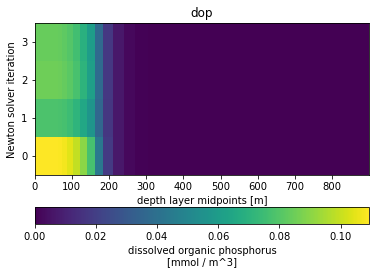

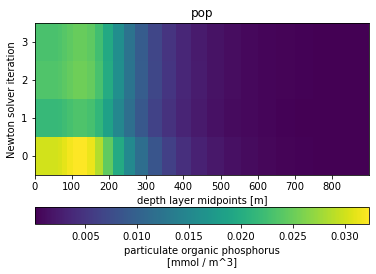

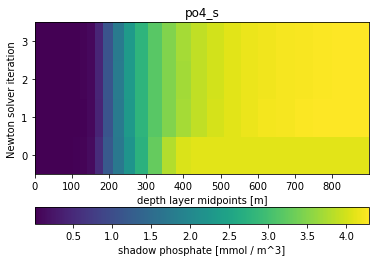

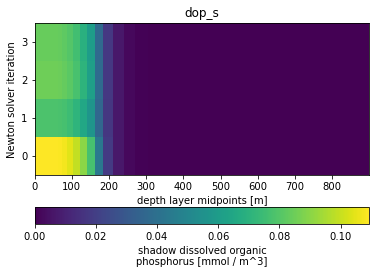

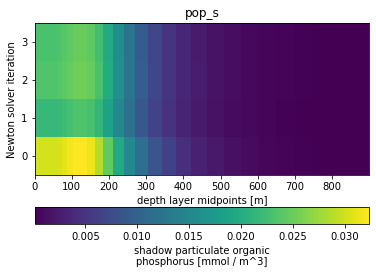

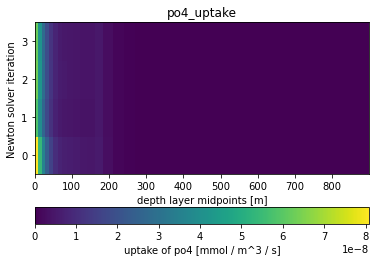

In [11]:
with xr.open_dataset(os.path.join(wdir, "Newton_stats.nc")) as ds:
    print(ds)
    plot_all_vars(ds)
    iterations = len(ds["iteration"])

In [12]:
iter_str_final = f"{iterations-1:02d}"
print(iter_str_final)

03


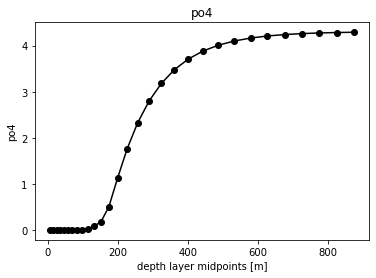

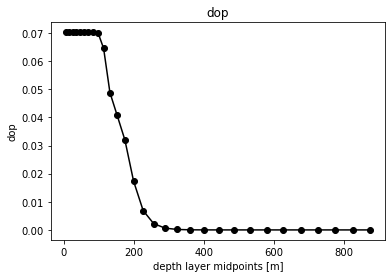

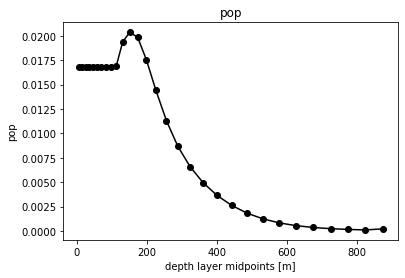

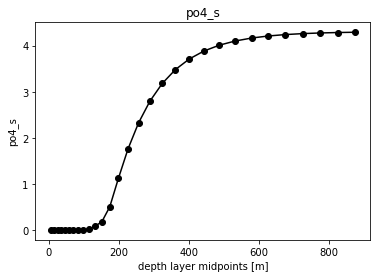

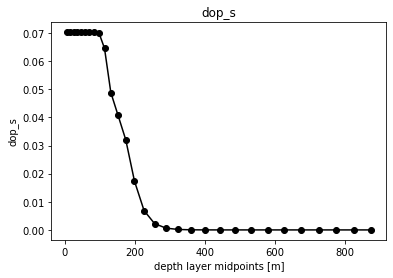

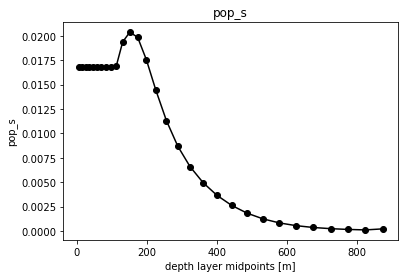

In [13]:
with xr.open_dataset(os.path.join(wdir, f"iterate_{iter_str_final}.nc")) as ds:
    plot_all_vars(ds)

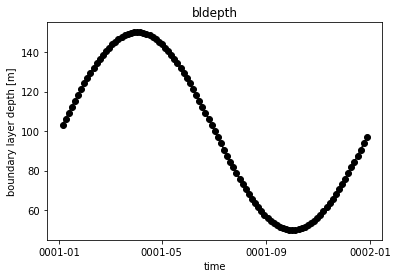

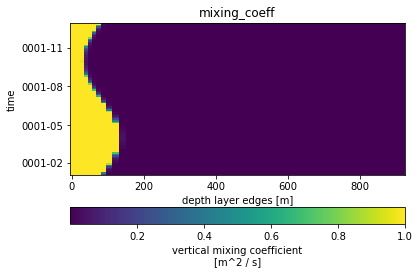

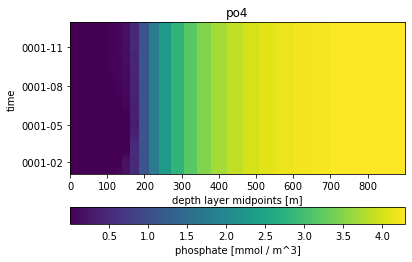

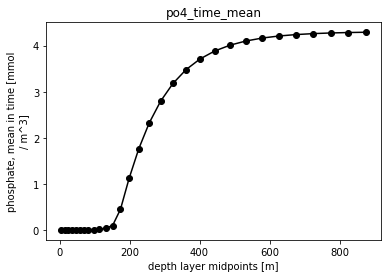

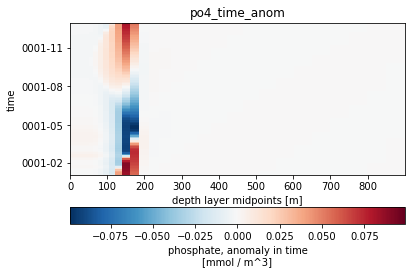

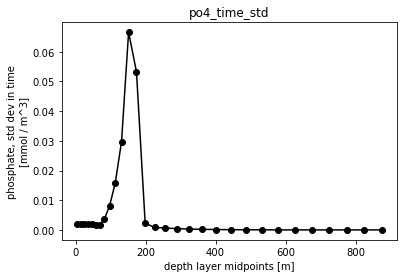

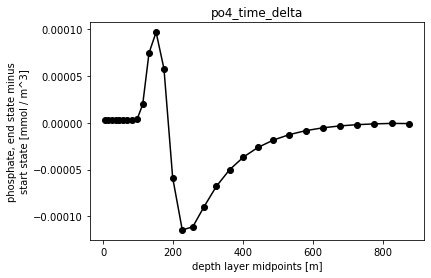

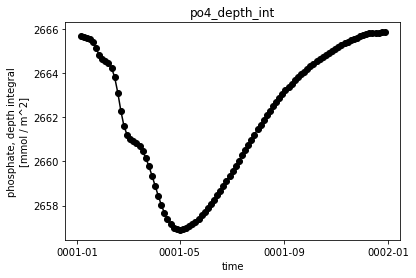

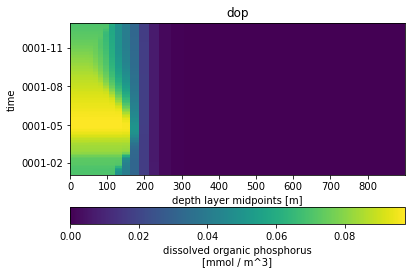

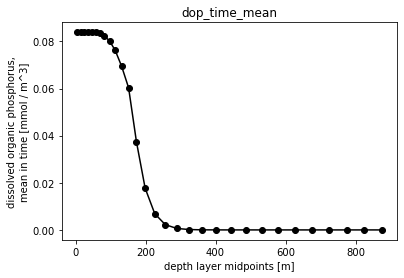

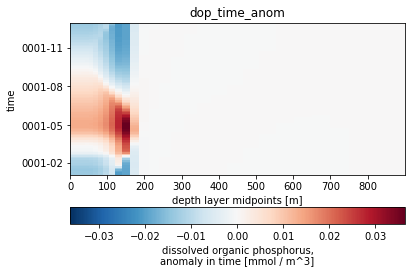

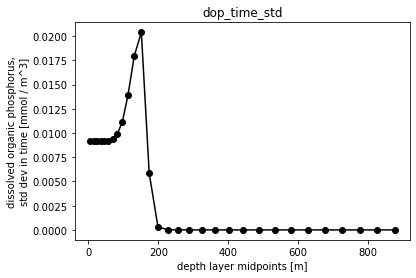

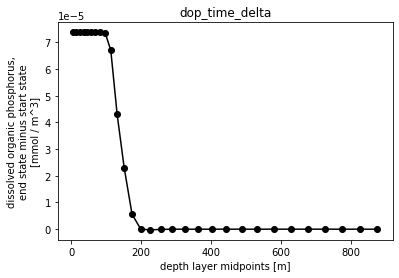

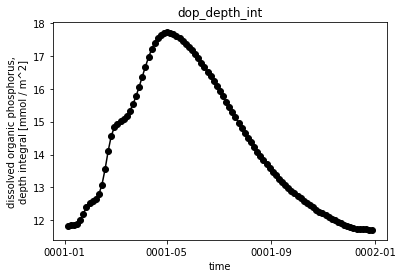

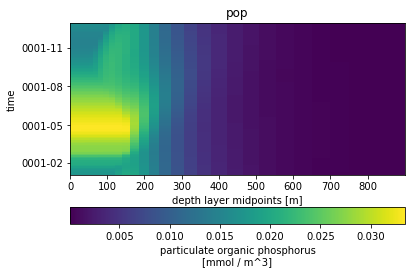

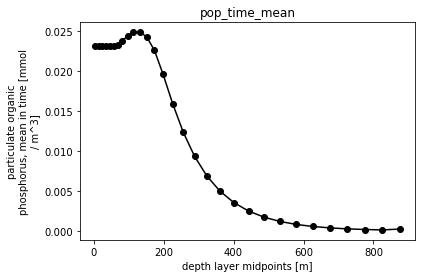

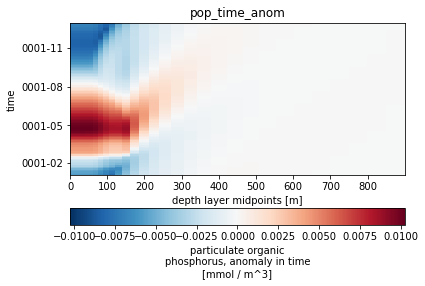

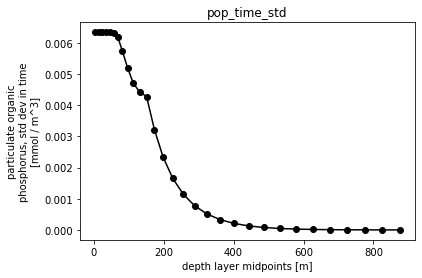

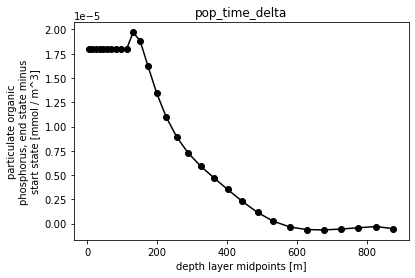

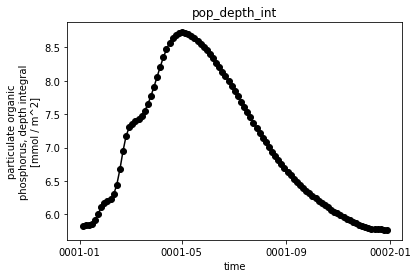

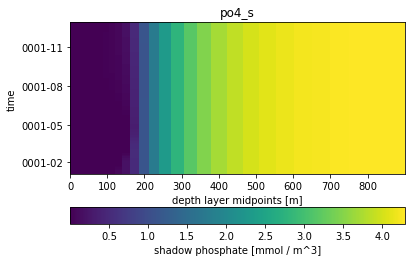

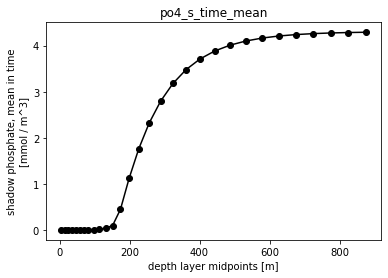

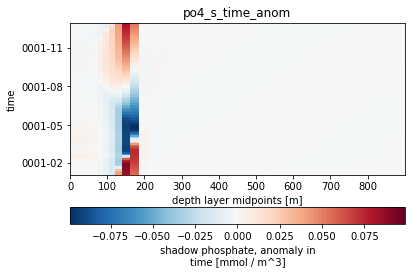

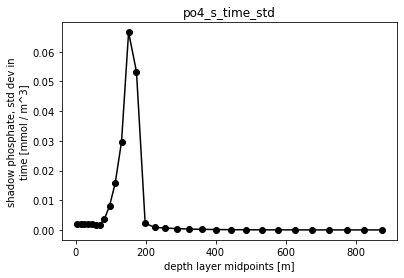

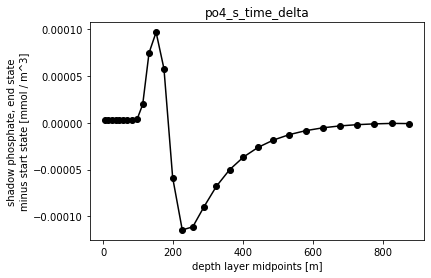

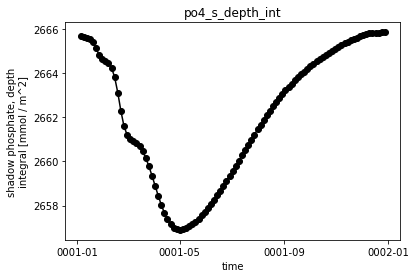

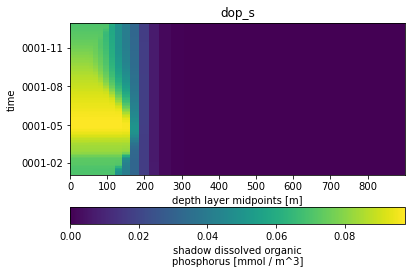

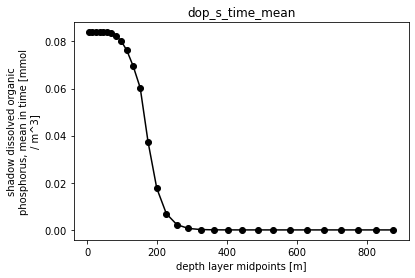

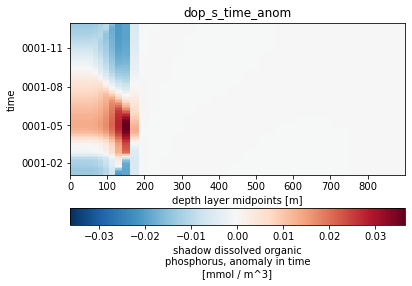

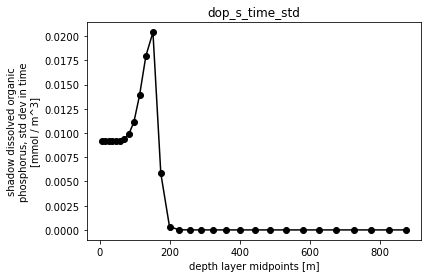

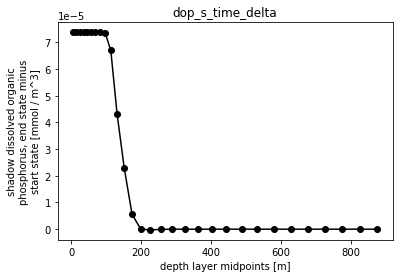

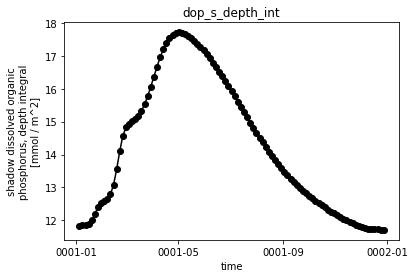

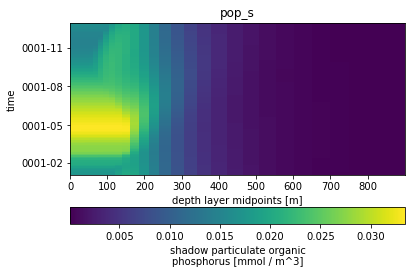

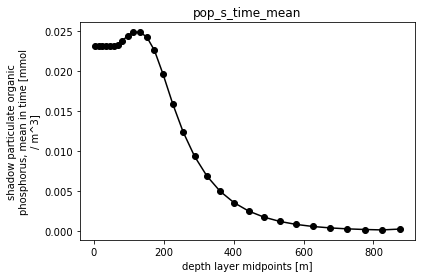

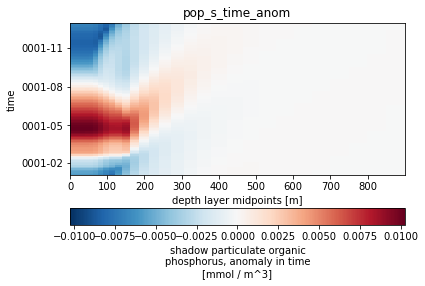

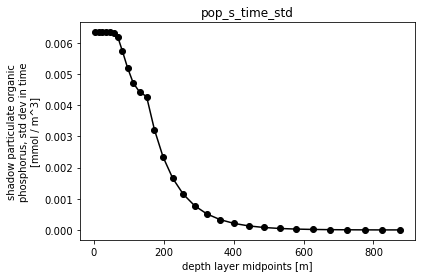

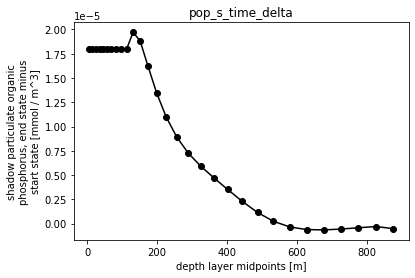

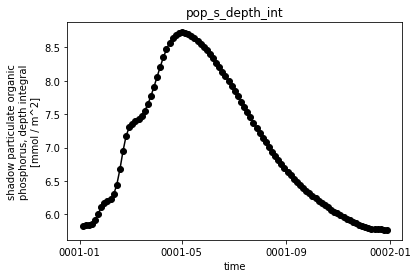

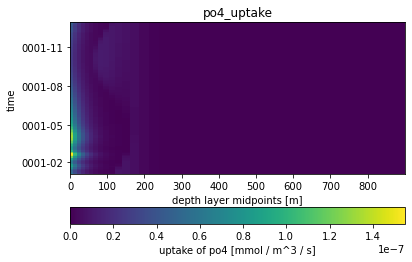

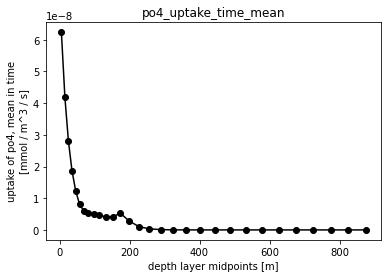

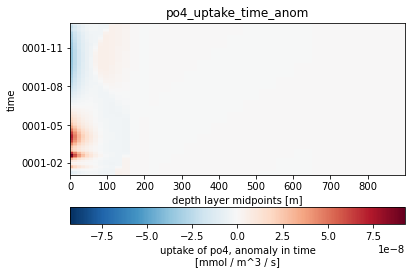

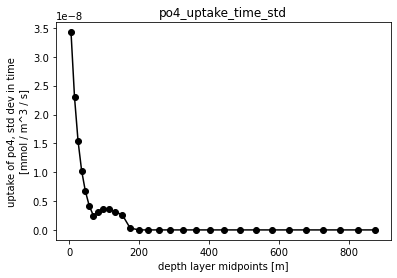

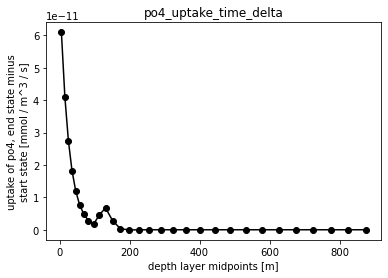

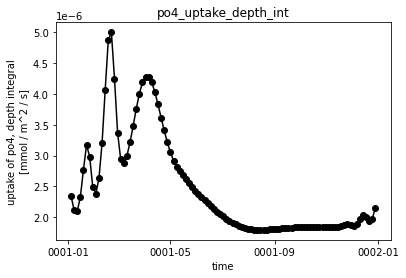

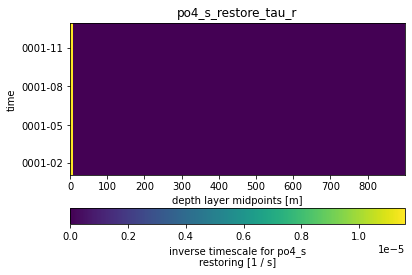

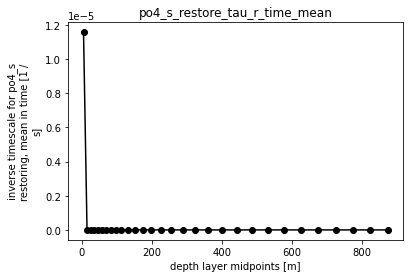

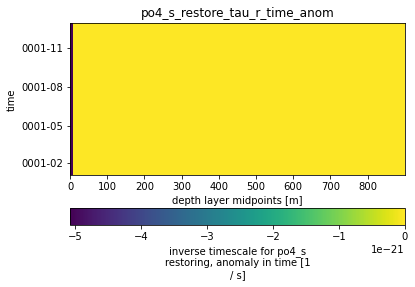

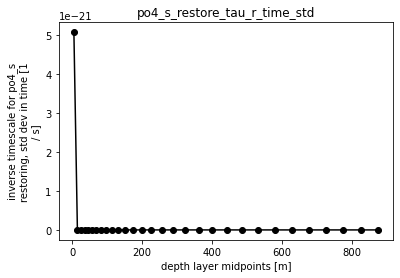

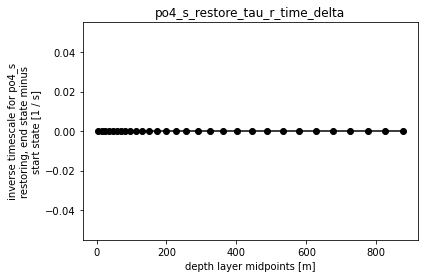

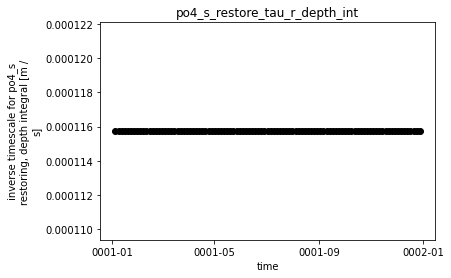

In [14]:
with xr.open_dataset(os.path.join(wdir, f"hist_{iter_str_final}.nc")) as ds:
    plot_all_vars(ds)

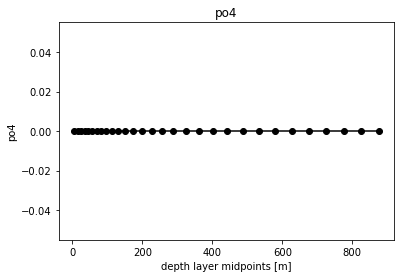

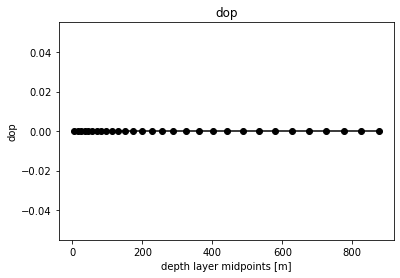

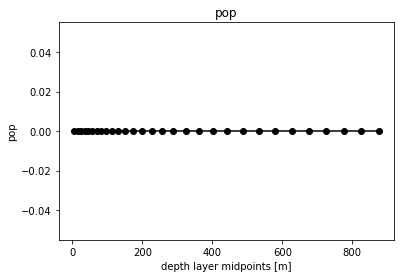

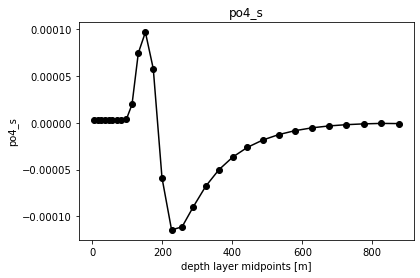

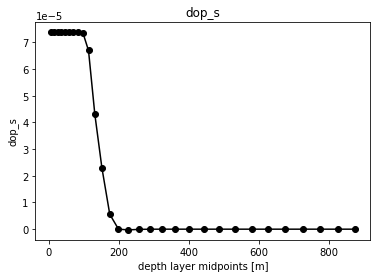

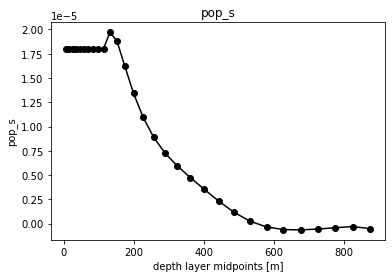

In [15]:
with xr.open_dataset(os.path.join(wdir, f"fcn_{iter_str_final}.nc")) as ds:
    plot_all_vars(ds)